In [2]:
!pip install pandas scikit-learn nltk textblob matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB 1.4 MB/s eta 0:00:01
   - -------------------------------------- 30.7/626.3 kB 1.4 MB/s eta 0:00:01
   - -------------------------------------- 30.7/626.3 kB 1.4 MB/s eta 0:00:01
   - -------------------------------------- 30.7/626.3 kB 1.4 MB/s eta 0:00:01
   - -------------------------------------- 30.7/626.3 kB 1.4 MB/s eta 0:00:01
   --- ----------------------------------- 61.4/626.3 kB 204.8 kB/s eta 0:00:03
   --- --------------

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\blogs.csv")

In [5]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
df['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

In [10]:
## Cleaning the text (removing punctuation, converting to lowercase)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

In [11]:
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [12]:
# Tokenization and removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIHAL_MIRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['Cleaned_Data'] = df['Cleaned_Data'].apply(remove_stopwords)

In [16]:
#Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = tfidf_vectorizer.fit_transform(df['Cleaned_Data'])

In [17]:
# Target variable (category labels)
y = df['Labels']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 #Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [22]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [23]:
#Evaluate the Naive Bayes Model
print("\nNaive Bayes Classification Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Naive Bayes Classification Evaluation:
Accuracy: 0.8250
Precision: 0.8297
Recall: 0.8250
F1-Score: 0.8206


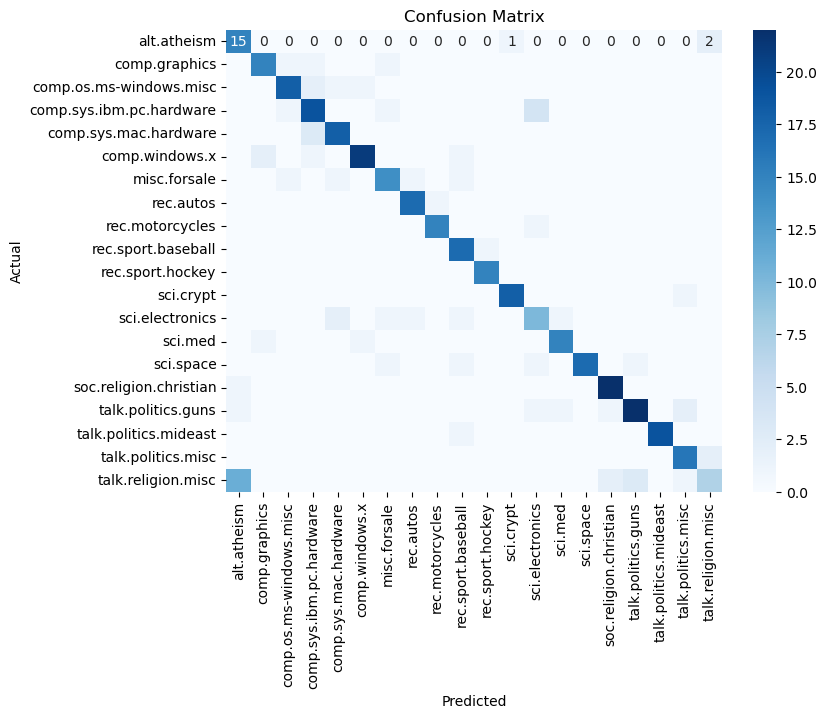

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df['Labels'].unique(), yticklabels=df['Labels'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
#Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['Sentiment'] = df['Cleaned_Data'].apply(analyze_sentiment)

In [26]:
# Sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_distribution)


Sentiment Distribution:
positive    1452
negative     545
neutral        3
Name: Sentiment, dtype: int64


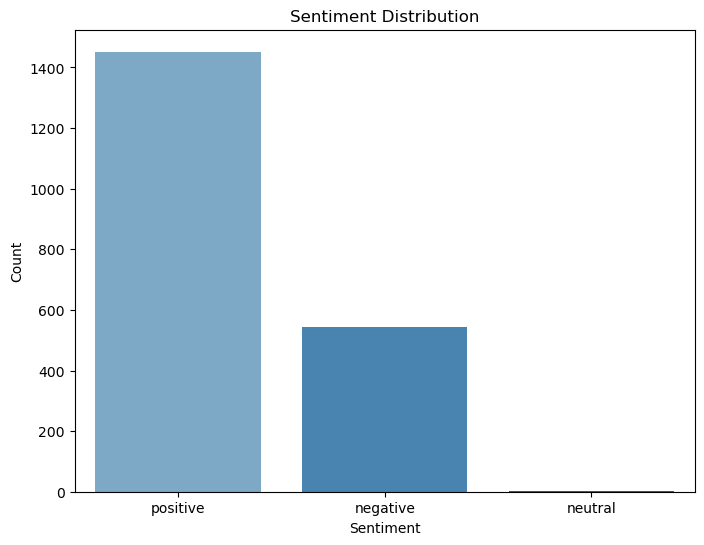

In [27]:
# Plot Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette="Blues_d")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

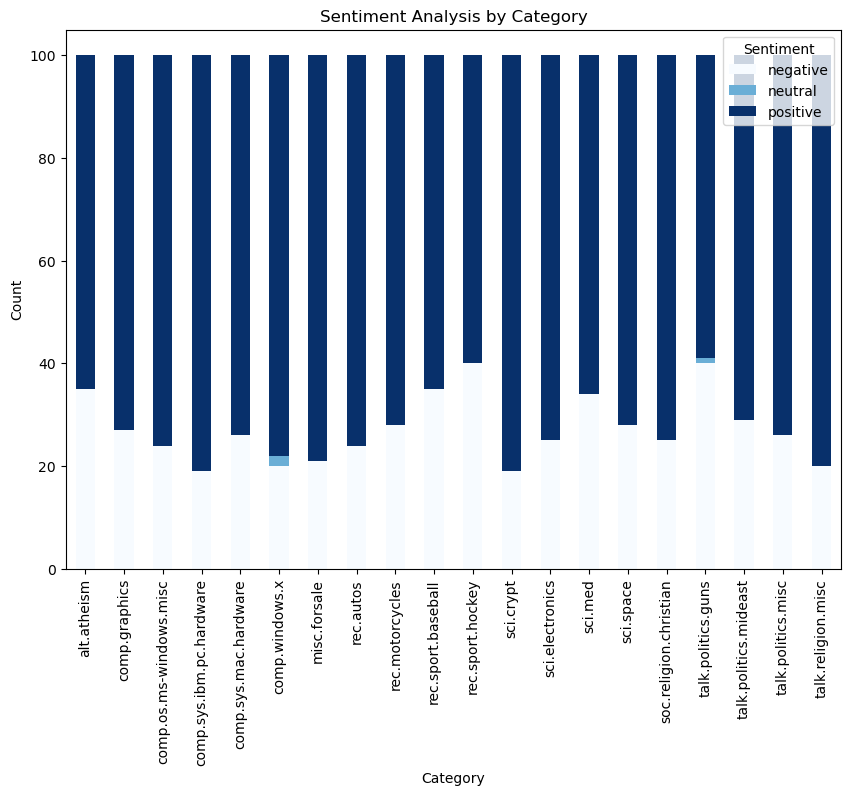

In [28]:
# Step 10: Sentiment by Category
sentiment_by_category = df.groupby(['Labels', 'Sentiment']).size().unstack()
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10, 7), colormap="Blues")
plt.title('Sentiment Analysis by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()